Two objectives for this code:
1. performing a classification task with Tensorflow
2. learning to identify and deal with overfitting through early stopping and adding dropout layers

Early stopping:
Keras can automatically stop training based on a loss condition on the validation data passed
during the model.fit() call.

Dropout layers:
can be added to layers to "turn off" neurons during training to prevent overfitting
Each Dropout layer will "drop" a user-defined percentage of neuron units in the previous layer every batch.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cancer_classification.csv')

In [5]:
df.info() # look for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


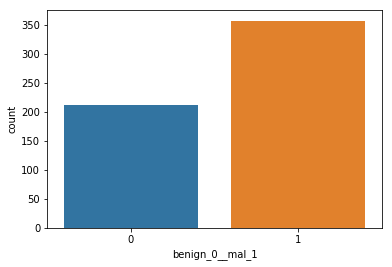

In [9]:
sns.countplot(x='benign_0__mal_1',data=df)

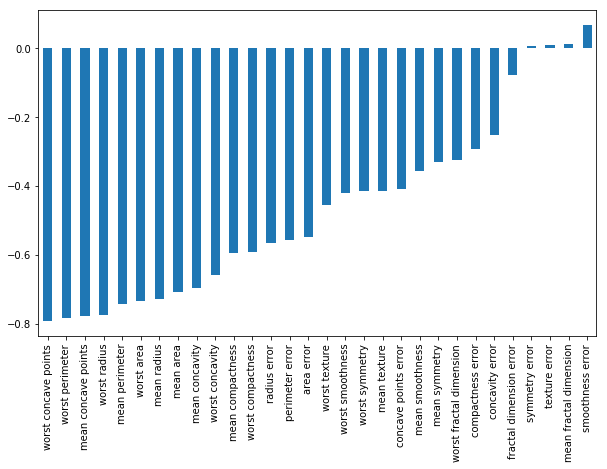

In [15]:
plt.figure(figsize=(10,6))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')



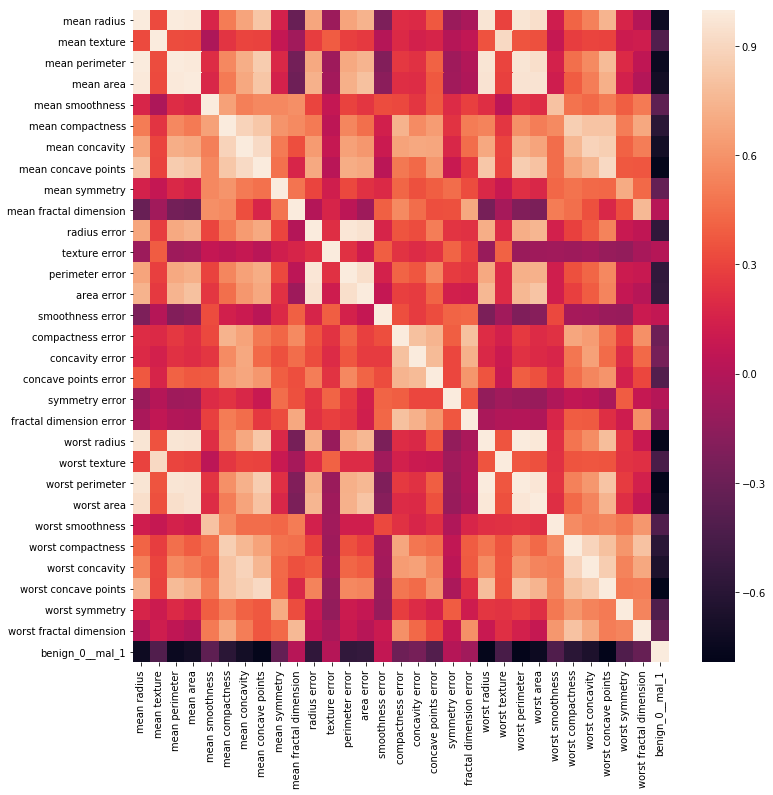

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())



In [18]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [19]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [28]:
X_test = scaler.transform(X_test)  #remember we don't want to fit to the test data

In [30]:
from tensorflow.keras.models import Sequential

In [31]:
from tensorflow.keras.layers import Dense, Dropout

In [32]:
X_train.shape

(426, 30)

In [34]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid')) #Binary classification should be sigmoid

model.compile(loss='binary_crossentropy',optimizer='adam')


In [35]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 49ms/step - loss: 0.6765 - val_loss: 0.6528
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6374 - val_loss: 0.6145
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5999 - val_loss: 0.5705
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5480 - val_loss: 0.5175
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4974 - val_loss: 0.4676
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4503 - val_loss: 0.4196
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4180 - val_loss: 0.3716
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3636 - val_loss: 0.3329
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3311 - val_loss: 0.2996
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2805 - val_loss: 0.2716
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0498 - val_loss: 0.1328
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0586 - val_loss: 0.1280
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0507 - val_loss: 0.1321
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0418 - val_loss: 0.1348
Epoch 87/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0463 - val_loss: 0.1321
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0514 - val_loss: 0.1314
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0486 - val_loss: 0.1452
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0642 - val_loss: 0.1245
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0468 - val_loss: 0.1346
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0601 - val_loss: 0.1305


14/14 [==============================] - 0s 4ms/step - loss: 0.0303 - val_loss: 0.1695
Epoch 165/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0442 - val_loss: 0.1552
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0516 - val_loss: 0.1539
Epoch 167/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0467 - val_loss: 0.1583
Epoch 168/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0440 - val_loss: 0.1517
Epoch 169/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0531 - val_loss: 0.1612
Epoch 170/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0473 - val_loss: 0.1429
Epoch 171/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0311 - val_loss: 0.1780
Epoch 172/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0443 - val_loss: 0.1530
Epoch 173/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0402 - val_loss: 0.1601
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0298 - val_loss: 0.1795
Epoch 246/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0322 - val_loss: 0.1672
Epoch 247/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.1853
Epoch 248/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0407 - val_loss: 0.1606
Epoch 249/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0297 - val_loss: 0.1804
Epoch 250/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0271 - val_loss: 0.1738
Epoch 251/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0270 - val_loss: 0.1735
Epoch 252/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0323 - val_loss: 0.1764
Epoch 253/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0305 - val_loss: 0.1726
Epoch 254/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0351 - val_loss: 0.1735
Epo

14/14 [==============================] - 0s 5ms/step - loss: 0.0239 - val_loss: 0.1861
Epoch 327/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0274 - val_loss: 0.1920
Epoch 328/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0218 - val_loss: 0.1914
Epoch 329/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0238 - val_loss: 0.2009
Epoch 330/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0203 - val_loss: 0.1901
Epoch 331/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0200 - val_loss: 0.1977
Epoch 332/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0270 - val_loss: 0.1824
Epoch 333/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0231 - val_loss: 0.2055
Epoch 334/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0243 - val_loss: 0.1876
Epoch 335/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0254 - val_loss: 0.2120
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0157 - val_loss: 0.2177
Epoch 408/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0140 - val_loss: 0.2142
Epoch 409/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0165 - val_loss: 0.2160
Epoch 410/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0249 - val_loss: 0.2112
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0124 - val_loss: 0.2217
Epoch 412/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0161 - val_loss: 0.2241
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0167 - val_loss: 0.2151
Epoch 414/600
14/14 [==============================] - 0s 19ms/step - loss: 0.0165 - val_loss: 0.2424
Epoch 415/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0166 - val_loss: 0.2126
Epoch 416/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0141 - val_loss: 0.2258
Epo

14/14 [==============================] - 0s 4ms/step - loss: 0.0154 - val_loss: 0.2772
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0154 - val_loss: 0.2491
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0135 - val_loss: 0.2674
Epoch 491/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0101 - val_loss: 0.2510
Epoch 492/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0118 - val_loss: 0.2514
Epoch 493/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0130 - val_loss: 0.3168
Epoch 494/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0121 - val_loss: 0.2383
Epoch 495/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0149 - val_loss: 0.2816
Epoch 496/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0136 - val_loss: 0.2383
Epoch 497/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0165 - val_loss: 0.2791
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0056 - val_loss: 0.2934
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0061 - val_loss: 0.3109
Epoch 571/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0057 - val_loss: 0.2904
Epoch 572/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0083 - val_loss: 0.3122
Epoch 573/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0064 - val_loss: 0.2917
Epoch 574/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.3019
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 0.3033
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0054 - val_loss: 0.2913
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0069 - val_loss: 0.3102
Epoch 578/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0064 - val_loss: 0.2959
Epo

In [36]:
losses = pd.DataFrame(model.history.history)

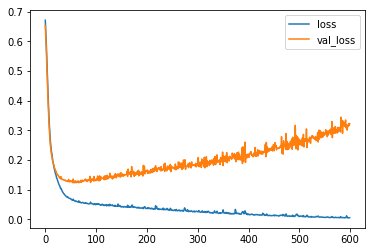

In [39]:
losses.plot()

Overfitting- at the beginning both validation and training loss are trending down together, which is great. At a certain point in time our training loss (in blue) is still going down, our validation loss is beginning to increase. That tells us that we are overfitting to our training data set. Too many epochs.

We are going to use Tensorflow Keras callbacks to stop the training.

In [40]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid')) #Binary classification should be sigmoid

model.compile(loss='binary_crossentropy',optimizer='adam')



In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantit

In [43]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
#mode if you want to min or max the attritube, if you want to max accuracy set mode to max
# patience how long to keep set running after you get to stopping point to account for noise

In [44]:
 model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop])
    

Epoch 1/600
14/14 [==============================] - 1s 17ms/step - loss: 0.6980 - val_loss: 0.6870
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6808 - val_loss: 0.6680
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6586 - val_loss: 0.6414
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6249 - val_loss: 0.5918
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5739 - val_loss: 0.5347
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5240 - val_loss: 0.4741
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4524 - val_loss: 0.4094
Epoch 8/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3890 - val_loss: 0.3516
Epoch 9/600
14/14 [==============================] - 0s 10ms/step - loss: 0.3407 - val_loss: 0.3068
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.2864 - val_loss: 0.2672
Epoch 1

In [46]:
model_loss = pd.DataFrame(model.history.history)

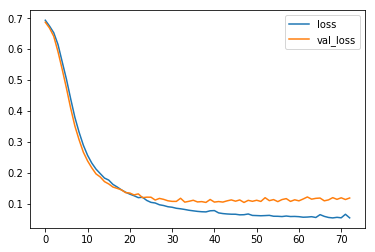

In [47]:
model_loss.plot()

A much better place to stop.

Now we will add dropout layers, which will turn off a % of nuerons randomly.

In [51]:
from tensorflow.keras.layers import Dropout
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5)) # % chance of nuerons turning off implemented randomly- half in this case will be turned off

model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid')) #Binary classification should be sigmoid

model.compile(loss='binary_crossentropy',optimizer='adam')





In [52]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop])
    

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.6966 - val_loss: 0.6664
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6760 - val_loss: 0.6373
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6421 - val_loss: 0.6096
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6355 - val_loss: 0.5770
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5922 - val_loss: 0.5336
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5532 - val_loss: 0.4909
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5042 - val_loss: 0.4433
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4751 - val_loss: 0.3982
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4324 - val_loss: 0.3551
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3880 - val_loss: 0.3174
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0624 - val_loss: 0.0955
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0623 - val_loss: 0.0910
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0852 - val_loss: 0.0919
Epoch 86/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0577 - val_loss: 0.0916
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0668 - val_loss: 0.0929
Epoch 88/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0918 - val_loss: 0.0924
Epoch 89/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0571 - val_loss: 0.0903
Epoch 90/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0685 - val_loss: 0.1076
Epoch 91/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1100 - val_loss: 0.0919
Epoch 92/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0664 - val_loss: 0.0921


In [53]:
model_loss = pd.DataFrame(model.history.history)

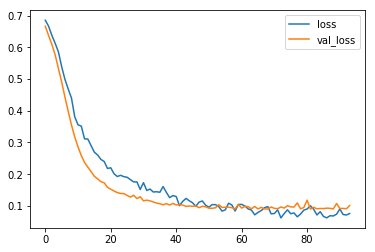

In [54]:
model_loss.plot()

This is much improved. 

In [57]:
predictions = model.predict_classes(X_test)

/Users/darylbolling/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [59]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
